## Generalization의 중요성
- Penalizing the magnitude of coefficient

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 20, 10

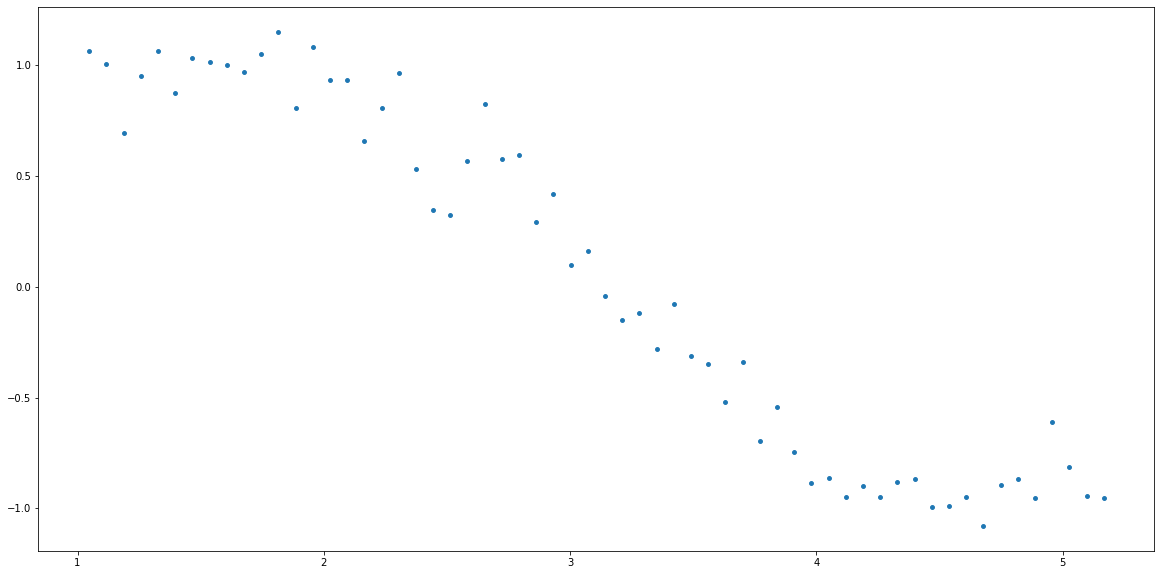

In [ ]:
x = np.array([i * np.pi/180 for i in range(60, 300, 4)])#sin 곡선 60~300도

np.random.seed(10)

y = np.sin(x) + np.random.normal(0, 0.15, len(x)) #sinx +노이즈

data = pd.DataFrame(np.column_stack([x, y]), columns=['X', 'y'])

plt.scatter(data['X'], data['y'], s=15)
plt.show()

In [ ]:
for i in range(2, 16):
  col_name = 'X_%d'%i
  data[col_name] = data['X']**i #x^2-x^15
print(data.head(3))

          X         y       X_2       X_3       X_4       X_5       X_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   

        X_7       X_8       X_9      X_10      X_11      X_12      X_13  \
0  1.381021  1.446202  1.514459  1.585938  1.660790  1.739176  1.821260   
1  2.169709  2.423588  2.707173  3.023942  3.377775  3.773011  4.214494   
2  3.316683  3.936319  4.671717  5.544505  6.580351  7.809718  9.268760   

        X_14       X_15  
0   1.907219   1.997235  
1   4.707635   5.258479  
2  11.000386  13.055521  


In [ ]:
from sklearn.linear_model import LinearRegression

def LR(data, power, plot):
  predictors = ['X']
  if power >= 2:#2차 폴리너미얼리그레션 
    predictors.extend(['X_%d'%i for i in range(2, power + 1)])

  reg = LinearRegression(normalize=True)
  reg.fit(data[predictors], data['y'])
  y_pred = reg.predict(data[predictors])

  if power in plot:
    plt.subplot(plot[power])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Power :  %d'%power)

  RSS = np.round(sum((y_pred - data['y'])**2), 3) #coeffecience 알아보기
  result = [RSS]
  result.extend([np.round(reg.intercept_, 3)])
  result.extend(np.round(reg.coef_, 3))
  return result

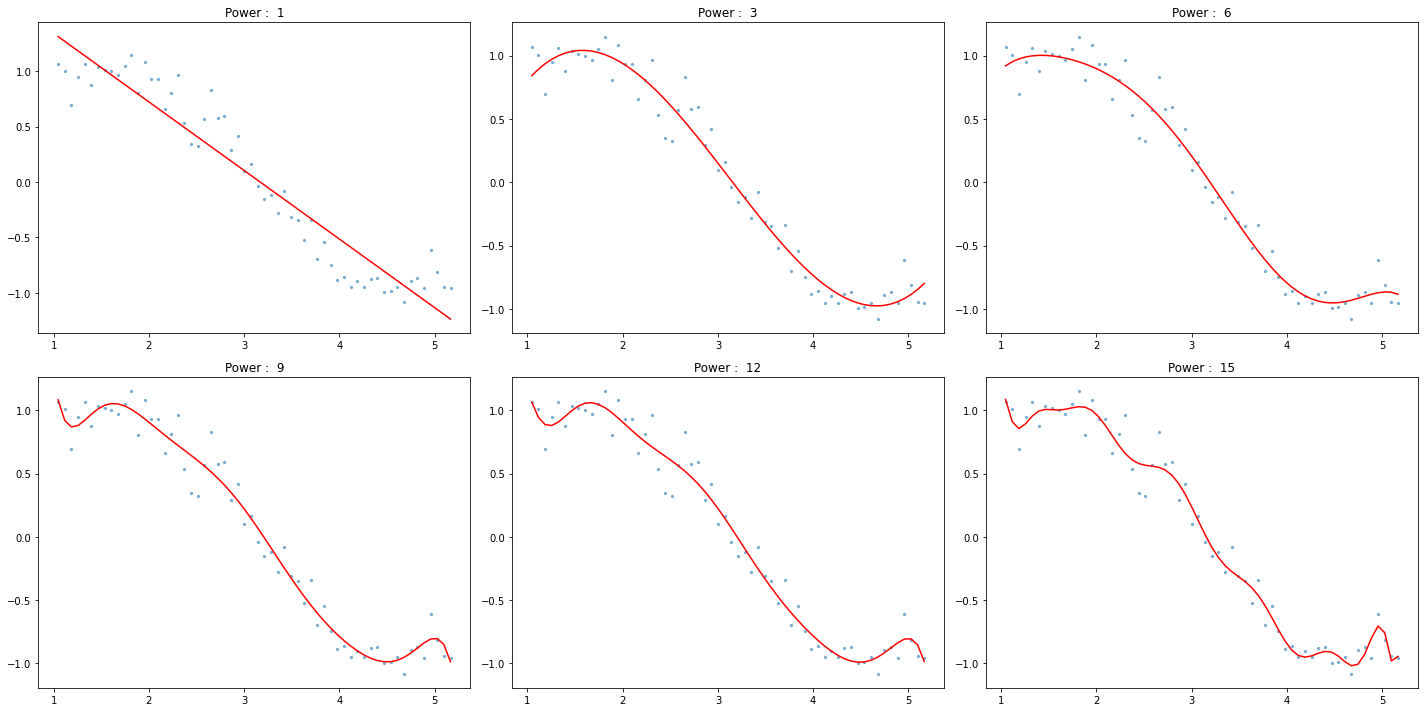

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['model_pow_%d'%i for i in range(1, 16)]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

for i in range(1, 16):
  coef_matrix.iloc[i - 1, 0 : i + 2] = LR(data, power=i, plot=plot)

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
model_pow_1,3.28,1.963,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.277,1.914,-0.583,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.103,-1.081,3.032,-1.286,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.079,-0.266,1.687,-0.532,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.019,2.992,-5.118,4.725,-1.929,0.335,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.802,9.517,-9.713,5.226,-1.555,0.233,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.928,19.302,-55.952,68.956,-44.632,16.515,-3.528,0.405,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.918,43.168,-137.013,183.825,-133.499,57.677,-15.253,2.417,-0.21,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.875,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.758,-5.221,0.422,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.875,137.717,-486.125,726.133,-595.881,293.256,-87.456,14.546,-0.806,-0.138,0.026,-0.001,NaN,NaN,NaN,NaN,NaN


## Ridge and LASSO (Least Absolute Shrinkage and Selection Operator)

### General Linear Regression

$min(y - WX)^2$

### Ridge Regression

$min(y - WX)^2 + λ||W||^2_2$

### LASSO Regression

$min(y - WX)^2 + \lambda ||W||^1_1$

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def ridge_regression(data, predictors, alpha, plot): #input 은 알파 
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Ridge with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

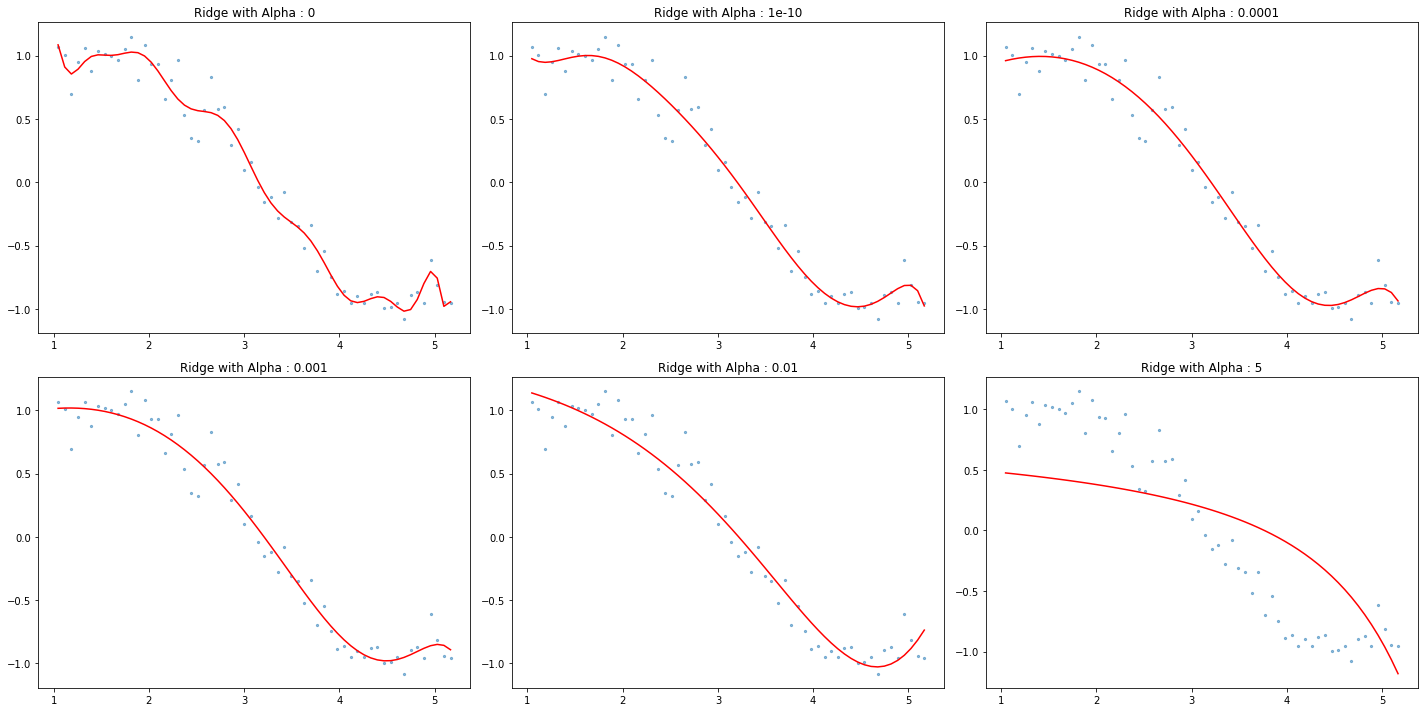

In [ ]:
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20] #변화보기, 0 일반적 선형회귀 

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = ridge_regression(data, predictors, ridge_alpha[i], plot=plot)

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,0.704827,-36240.470358,243816.61783,-745753.625685,1376021.526103,-1713483.752373,1526017.298206,-1004686.901793,498251.098127,-187799.113591,53841.565644,-11655.554587,1872.63992,-216.344858,16.982266,-0.810602,0.017752
alpha : 1e-10,0.922601,11.170114,-28.962899,31.069376,-15.2353,2.891818,0.169365,-0.091002,-0.010838,0.001984,0.000637,0.000024,-0.00002,-0.000004,0.0,0.0,-0.0
alpha : 1e-08,0.949292,1.339994,-1.530652,1.749461,-0.680458,0.038843,0.015818,0.000159,-0.00036,-0.000054,-0.0,0.000001,0.0,0.0,0.0,0.0,-0.0
alpha : 0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282,-0.00011,0.000041,0.000015,0.000004,0.000001,0.0,0.0,0.0,-0.0,-0.0,-0.0
alpha : 0.001,1.001776,0.817638,0.305147,-0.086687,-0.020475,-0.002836,-0.000219,0.000018,0.000012,0.000003,0.000001,0.0,0.0,0.0,-0.0,-0.0,-0.0
alpha : 0.01,1.435788,1.298887,-0.088396,-0.0515,-0.010099,-0.001412,-0.000132,0.000001,0.000004,0.000001,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0
alpha : 1,5.648744,0.968886,-0.139008,-0.019268,-0.003004,-0.000466,-0.00007,-0.00001,-0.000001,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
alpha : 5,13.838317,0.54826,-0.058869,-0.008522,-0.001419,-0.000241,-0.000041,-0.000007,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
alpha : 10,18.024827,0.400342,-0.037236,-0.005527,-0.00095,-0.000167,-0.00003,-0.000005,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
alpha : 20,22.720546,0.276703,-0.022469,-0.003405,-0.000599,-0.000108,-0.00002,-0.000004,-0.000001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
pd.options.display.float_format = lambda x: f'{x:e}'
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.226014e-01,1.117011e+01,-2.896290e+01,3.106938e+01,-1.523530e+01,2.891818e+00,1.693646e-01,-9.100186e-02,-1.083829e-02,1.983776e-03,6.369725e-04,2.408437e-05,-2.001130e-05,-4.203692e-06,2.193530e-07,2.272903e-07,-2.337408e-08
alpha : 1e-08,9.492921e-01,1.339994e+00,-1.530652e+00,1.749461e+00,-6.804584e-01,3.884301e-02,1.581786e-02,1.591800e-04,-3.595397e-04,-5.371822e-05,-2.910130e-07,1.080910e-06,1.893892e-07,1.961910e-08,3.928641e-09,8.190009e-10,-4.627223e-10
alpha : 0.0001,9.620184e-01,5.613205e-01,5.465491e-01,-1.281423e-01,-2.571298e-02,-2.820243e-03,-1.102989e-04,4.057499e-05,1.520747e-05,3.652391e-06,7.365854e-07,1.303511e-07,1.944499e-08,1.935329e-09,-1.302593e-10,-1.549432e-10,-6.177070e-11
alpha : 0.001,1.001776e+00,8.176382e-01,3.051465e-01,-8.668731e-02,-2.047550e-02,-2.836433e-03,-2.191995e-04,1.812031e-05,1.239899e-05,3.429712e-06,7.282243e-07,1.293461e-07,1.868652e-08,1.706217e-09,-1.510800e-10,-1.404477e-10,-5.160335e-11
alpha : 0.01,1.435788e+00,1.298887e+00,-8.839592e-02,-5.150014e-02,-1.009896e-02,-1.412439e-03,-1.315210e-04,7.230824e-07,4.136174e-06,1.304781e-06,2.964169e-07,5.615697e-08,8.971846e-09,1.094060e-09,4.292489e-11,-3.142258e-11,-1.487049e-11
alpha : 1,5.648744e+00,9.688857e-01,-1.390082e-01,-1.926803e-02,-3.004342e-03,-4.655190e-04,-6.970064e-05,-9.900640e-06,-1.292364e-06,-1.428457e-07,-9.330249e-09,1.306878e-09,7.803499e-10,2.402307e-10,6.156267e-11,1.445805e-11,3.227126e-12
alpha : 5,1.383832e+01,5.482603e-01,-5.886866e-02,-8.521666e-03,-1.419446e-03,-2.410036e-04,-4.083178e-05,-6.874313e-06,-1.148980e-06,-1.905338e-07,-3.131459e-08,-5.091884e-09,-8.169533e-10,-1.288036e-10,-1.982961e-11,-2.950057e-12,-4.162333e-13
alpha : 10,1.802483e+01,4.003424e-01,-3.723644e-02,-5.526795e-03,-9.496340e-04,-1.672916e-04,-2.958106e-05,-5.230317e-06,-9.245272e-07,-1.634447e-07,-2.891106e-08,-5.118376e-09,-9.071132e-10,-1.609540e-10,-2.859418e-11,-5.086237e-12,-9.058459e-13
alpha : 20,2.272055e+01,2.767034e-01,-2.246934e-02,-3.404918e-03,-5.993441e-04,-1.084581e-04,-1.974396e-05,-3.600769e-06,-6.575756e-07,-1.202802e-07,-2.204285e-08,-4.048138e-09,-7.450849e-10,-1.374475e-10,-2.541229e-11,-4.708773e-12,-8.743795e-13


In [ ]:
def lasso_regression(data, predictors, alpha, plot):
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Lasso(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Lasso with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

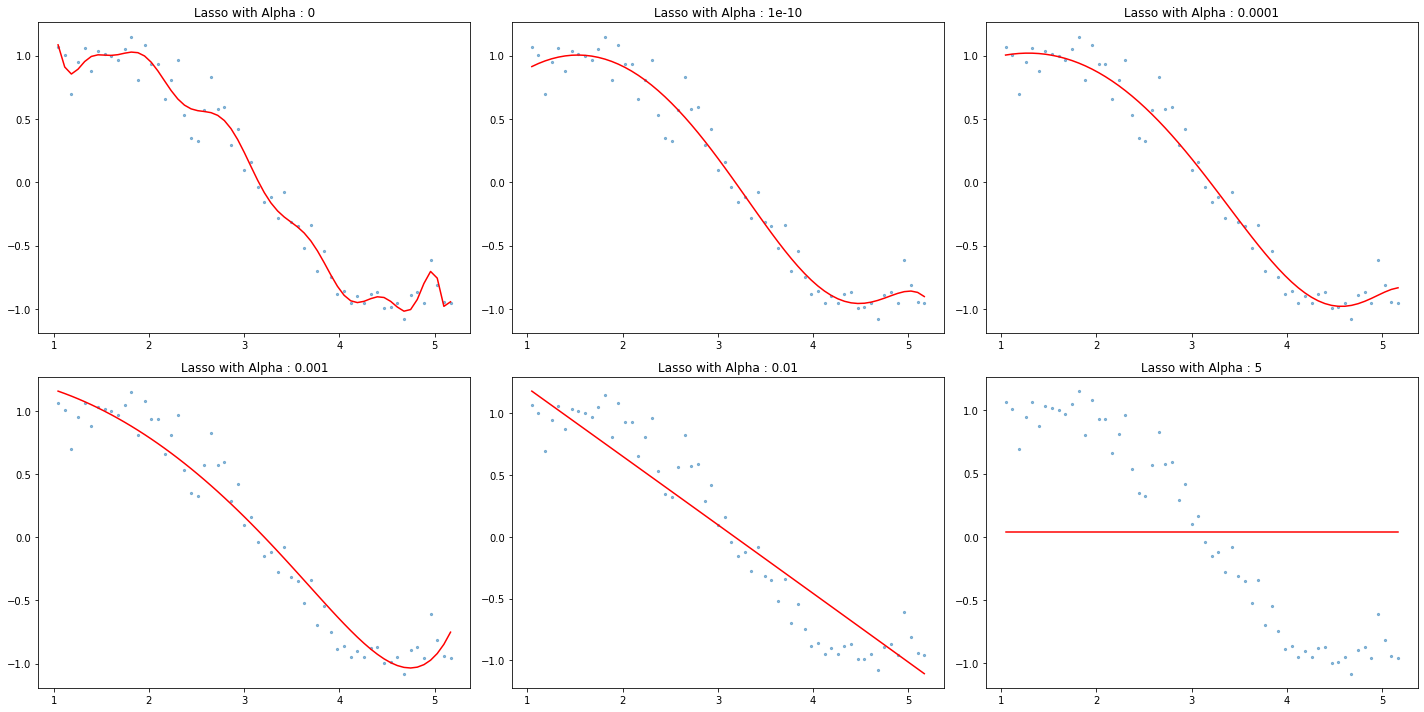

In [ ]:
predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = lasso_regression(data, predictors, ridge_alpha[i], plot=plot)#intercept 데이터의 평균값

In [ ]:
coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.730067e-01,1.358276e-01,1.086127e+00,-3.030930e-01,-2.366229e-02,-5.205817e-04,3.015160e-04,8.798707e-05,1.732897e-05,2.854704e-06,4.056757e-07,4.677639e-08,2.949573e-09,-5.342563e-10,-2.963984e-10,-9.026802e-11,-2.298282e-11
alpha : 1e-08,9.730047e-01,1.358788e-01,1.086071e+00,-3.030793e-01,-2.366200e-02,-5.204404e-04,3.013930e-04,8.799096e-05,1.732932e-05,2.854697e-06,4.056621e-07,4.677188e-08,2.948424e-09,-5.329120e-10,-2.964196e-10,-9.027707e-11,-2.298485e-11
alpha : 0.0001,1.042473e+00,6.132487e-01,5.963405e-01,-1.897246e-01,-2.204309e-02,-0.000000e+00,-0.000000e+00,1.098455e-05,2.355889e-05,3.179783e-06,3.153332e-07,4.414926e-09,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-2.903171e-11
alpha : 0.001,1.678833e+00,1.294625e+00,-0.000000e+00,-1.260874e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.496062e-08,7.526311e-10,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 0.01,3.639071e+00,1.759376e+00,-5.520656e-01,-5.623230e-04,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 1,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 5,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 10,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 20,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00


## 실습 1
- 아래 데이터셋으로 각각 결과를 출력하시오

1. 전체 변수를 사용했을 때의 linear regression 결과와 그 회귀 계수

2. 전체 변수를 사용했을 때의 ridge regression 결과와 그 회귀 계수

3. 전체 변수를 사용했을 때의 lasso regression 결과와 그 회귀 계수


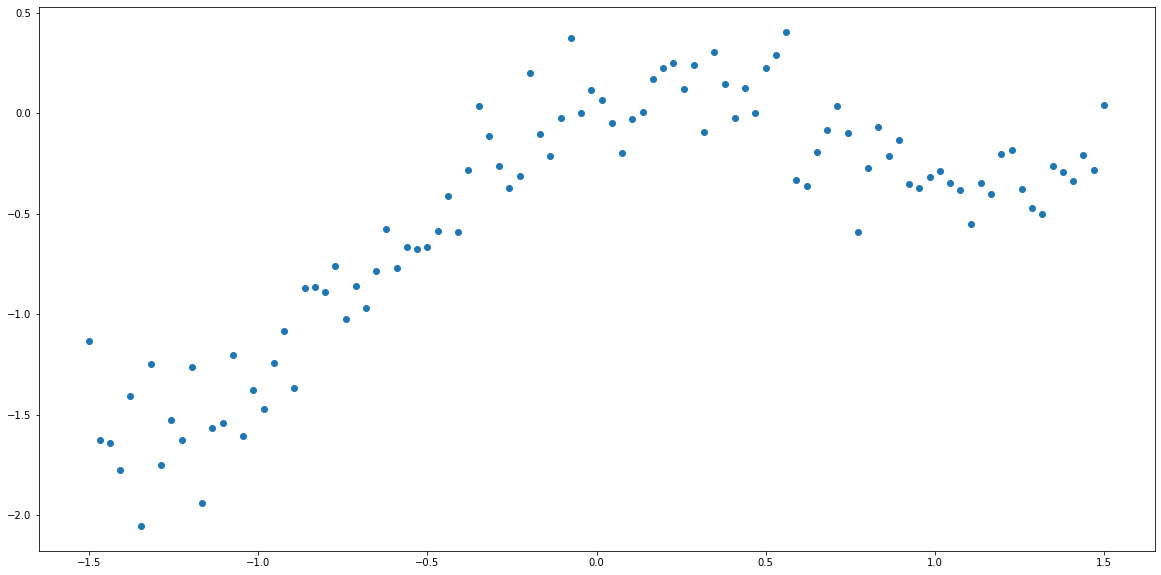

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,-1.500000e+00,2.250000e+00,-3.375000e+00,5.062500e+00,-7.593750e+00,1.139062e+01,-1.708594e+01,2.562891e+01,-3.844336e+01,5.766504e+01,-8.649756e+01,1.297463e+02,-1.946195e+02,2.919293e+02,-4.378939e+02
1,-1.469697e+00,2.160009e+00,-3.174559e+00,4.665640e+00,-6.857076e+00,1.007782e+01,-1.481135e+01,2.176819e+01,-3.199265e+01,4.701950e+01,-6.910441e+01,1.015625e+02,-1.492662e+02,2.193760e+02,-3.224163e+02
2,-1.439394e+00,2.071855e+00,-2.982215e+00,4.292583e+00,-6.178718e+00,8.893609e+00,-1.280141e+01,1.842627e+01,-2.652266e+01,3.817655e+01,-5.495110e+01,7.909628e+01,-1.138507e+02,1.638760e+02,-2.358821e+02
3,-1.409091e+00,1.985537e+00,-2.797802e+00,3.942358e+00,-5.555141e+00,7.827698e+00,-1.102994e+01,1.554219e+01,-2.190035e+01,3.085959e+01,-4.348397e+01,6.127286e+01,-8.633903e+01,1.216595e+02,-1.714294e+02
4,-1.378788e+00,1.901056e+00,-2.621153e+00,3.614014e+00,-4.982959e+00,6.870443e+00,-9.472884e+00,1.306110e+01,-1.800848e+01,2.482988e+01,-3.423513e+01,4.720299e+01,-6.508291e+01,8.973552e+01,-1.237263e+02
5,-1.348485e+00,1.818411e+00,-2.452100e+00,3.306620e+00,-4.458927e+00,6.012795e+00,-8.108164e+00,1.093374e+01,-1.474398e+01,1.988203e+01,-2.681062e+01,3.615371e+01,-4.875273e+01,6.574232e+01,-8.865252e+01
6,-1.318182e+00,1.737603e+00,-2.290477e+00,3.019265e+00,-3.979941e+00,5.246285e+00,-6.915558e+00,9.115963e+00,-1.201650e+01,1.583993e+01,-2.087990e+01,2.752351e+01,-3.628099e+01,4.782494e+01,-6.304197e+01
7,-1.287879e+00,1.658632e+00,-2.136117e+00,2.751059e+00,-3.543031e+00,4.562994e+00,-5.876584e+00,7.568328e+00,-9.747089e+00,1.255307e+01,-1.616683e+01,2.082092e+01,-2.681482e+01,3.453424e+01,-4.447591e+01
8,-1.257576e+00,1.581497e+00,-1.988852e+00,2.501132e+00,-3.145363e+00,3.955532e+00,-4.974382e+00,6.255662e+00,-7.866969e+00,9.893309e+00,-1.244159e+01,1.564624e+01,-1.967633e+01,2.474447e+01,-3.111805e+01
9,-1.227273e+00,1.506198e+00,-1.848516e+00,2.268633e+00,-2.784232e+00,3.417012e+00,-4.193606e+00,5.146698e+00,-6.316402e+00,7.751948e+00,-9.513754e+00,1.167597e+01,-1.432960e+01,1.758633e+01,-2.158322e+01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(1)

x = np.linspace(-1.5, 1.5, 100)
y = np.sin(0.5*x) - np.sin(x**2) + np.random.normal(0, 0.2, 100)

x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree = 15, include_bias=False)
x_poly = polynomial_features.fit_transform(x)

plt.scatter(x, y)
plt.show()

df= pd.DataFrame(x_poly, columns = ['x_%d'%i for i in range(1, 16)])
df.head(10)

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
model_pow_1,3.280000e+00,1.963000e+00,-6.200000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.277000e+00,1.914000e+00,-5.830000e-01,-6.000000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.103000e+00,-1.081000e+00,3.032000e+00,-1.286000e+00,1.370000e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.079000e+00,-2.660000e-01,1.687000e+00,-5.320000e-01,-3.600000e-02,1.400000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.019000e+00,2.992000e+00,-5.118000e+00,4.725000e+00,-1.929000e+00,3.350000e-01,-2.100000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,9.900000e-01,-2.802000e+00,9.517000e+00,-9.713000e+00,5.226000e+00,-1.555000e+00,2.330000e-01,-1.400000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,9.280000e-01,1.930200e+01,-5.595200e+01,6.895600e+01,-4.463200e+01,1.651500e+01,-3.528000e+00,4.050000e-01,-1.900000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,9.180000e-01,4.316800e+01,-1.370130e+02,1.838250e+02,-1.334990e+02,5.767700e+01,-1.525300e+01,2.417000e+00,-2.100000e-01,8.000000e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,8.750000e-01,1.678350e+02,-6.145130e+02,9.634030e+02,-8.464370e+02,4.609050e+02,-1.618490e+02,3.675800e+01,-5.221000e+00,4.220000e-01,-1.500000e-02,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,8.750000e-01,1.377170e+02,-4.861250e+02,7.261330e+02,-5.958810e+02,2.932560e+02,-8.745600e+01,1.454600e+01,-8.060000e-01,-1.380000e-01,2.600000e-02,-1.000000e-03,NaN,NaN,NaN,NaN,NaN


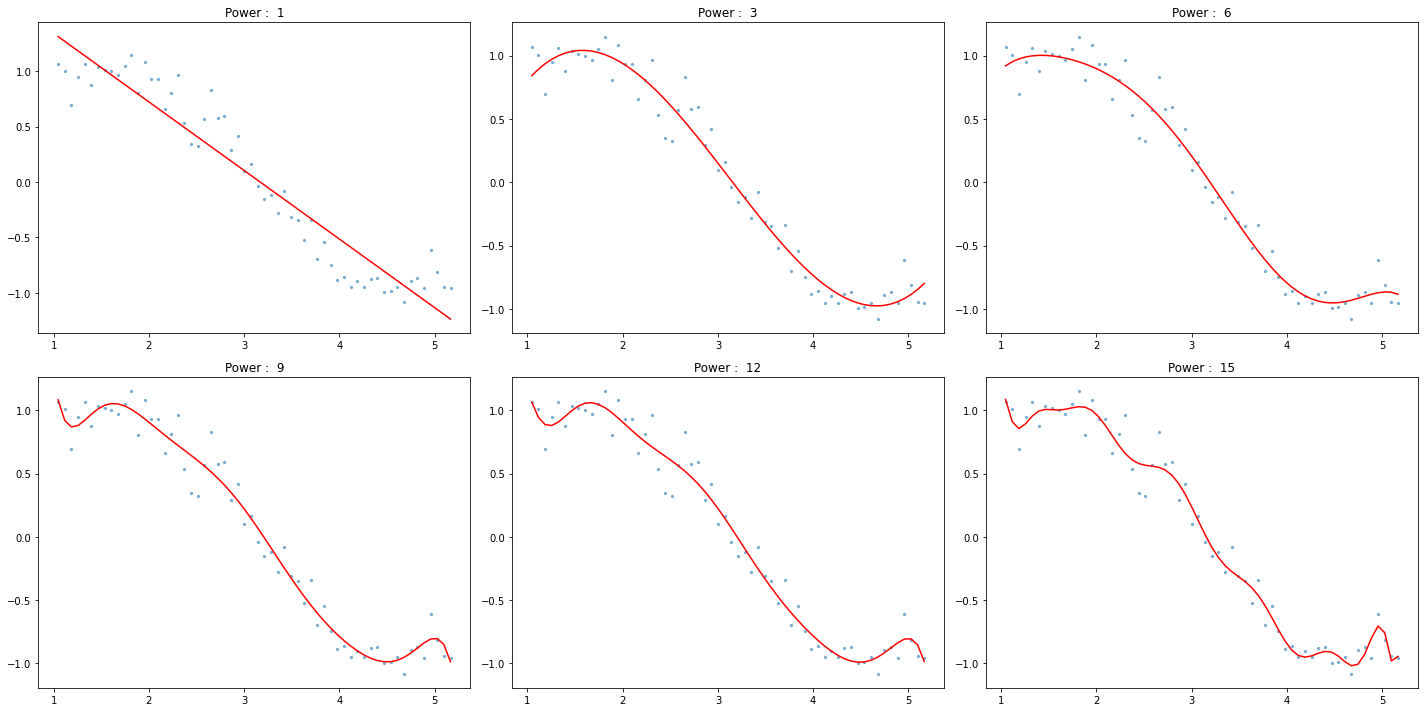

In [ ]:
from sklearn.linear_model import LinearRegression

def LR(data, power, plot):
  predictors = ['X']
  if power >= 2:
    predictors.extend(['X_%d'%i for i in range(2, power + 1)])

  reg = LinearRegression(normalize=True)
  reg.fit(data[predictors], data['y'])
  y_pred = reg.predict(data[predictors])

  if power in plot:
    plt.subplot(plot[power])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Power :  %d'%power)

  RSS = np.round(sum((y_pred - data['y'])**2), 3) 
  result = [RSS]
  result.extend([np.round(reg.intercept_, 3)])
  result.extend(np.round(reg.coef_, 3))
  return result

import warnings
warnings.filterwarnings(action='ignore')

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['model_pow_%d'%i for i in range(1, 16)]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236}

for i in range(1, 16):
  coef_matrix.iloc[i - 1, 0 : i + 2] = LR(data, power=i, plot=plot)

coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.226014e-01,1.117011e+01,-2.896290e+01,3.106938e+01,-1.523530e+01,2.891818e+00,1.693646e-01,-9.100186e-02,-1.083829e-02,1.983776e-03,6.369725e-04,2.408437e-05,-2.001130e-05,-4.203692e-06,2.193530e-07,2.272903e-07,-2.337408e-08
alpha : 1e-08,9.492921e-01,1.339994e+00,-1.530652e+00,1.749461e+00,-6.804584e-01,3.884301e-02,1.581786e-02,1.591800e-04,-3.595397e-04,-5.371822e-05,-2.910130e-07,1.080910e-06,1.893892e-07,1.961910e-08,3.928641e-09,8.190009e-10,-4.627223e-10
alpha : 0.0001,9.620184e-01,5.613205e-01,5.465491e-01,-1.281423e-01,-2.571298e-02,-2.820243e-03,-1.102989e-04,4.057499e-05,1.520747e-05,3.652391e-06,7.365854e-07,1.303511e-07,1.944499e-08,1.935329e-09,-1.302593e-10,-1.549432e-10,-6.177070e-11
alpha : 0.001,1.001776e+00,8.176382e-01,3.051465e-01,-8.668731e-02,-2.047550e-02,-2.836433e-03,-2.191995e-04,1.812031e-05,1.239899e-05,3.429712e-06,7.282243e-07,1.293461e-07,1.868652e-08,1.706217e-09,-1.510800e-10,-1.404477e-10,-5.160335e-11
alpha : 0.01,1.435788e+00,1.298887e+00,-8.839592e-02,-5.150014e-02,-1.009896e-02,-1.412439e-03,-1.315210e-04,7.230824e-07,4.136174e-06,1.304781e-06,2.964169e-07,5.615697e-08,8.971846e-09,1.094060e-09,4.292489e-11,-3.142258e-11,-1.487049e-11
alpha : 1,5.648744e+00,9.688857e-01,-1.390082e-01,-1.926803e-02,-3.004342e-03,-4.655190e-04,-6.970064e-05,-9.900640e-06,-1.292364e-06,-1.428457e-07,-9.330249e-09,1.306878e-09,7.803499e-10,2.402307e-10,6.156267e-11,1.445805e-11,3.227126e-12
alpha : 5,1.383832e+01,5.482603e-01,-5.886866e-02,-8.521666e-03,-1.419446e-03,-2.410036e-04,-4.083178e-05,-6.874313e-06,-1.148980e-06,-1.905338e-07,-3.131459e-08,-5.091884e-09,-8.169533e-10,-1.288036e-10,-1.982961e-11,-2.950057e-12,-4.162333e-13
alpha : 10,1.802483e+01,4.003424e-01,-3.723644e-02,-5.526795e-03,-9.496340e-04,-1.672916e-04,-2.958106e-05,-5.230317e-06,-9.245272e-07,-1.634447e-07,-2.891106e-08,-5.118376e-09,-9.071132e-10,-1.609540e-10,-2.859418e-11,-5.086237e-12,-9.058459e-13
alpha : 20,2.272055e+01,2.767034e-01,-2.246934e-02,-3.404918e-03,-5.993441e-04,-1.084581e-04,-1.974396e-05,-3.600769e-06,-6.575756e-07,-1.202802e-07,-2.204285e-08,-4.048138e-09,-7.450849e-10,-1.374475e-10,-2.541229e-11,-4.708773e-12,-8.743795e-13


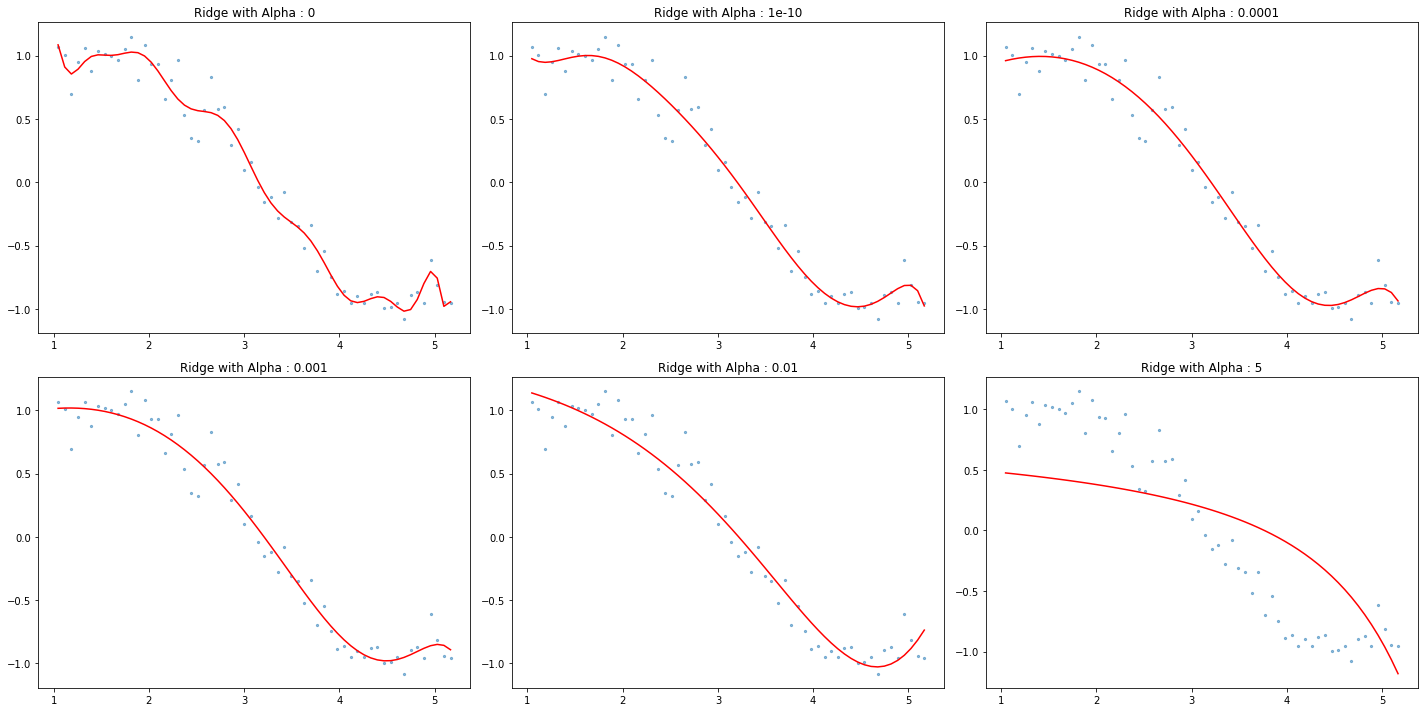

In [ ]:
from sklearn.linear_model import Ridge, Lasso

def ridge_regression(data, predictors, alpha, plot): #input 은 알파 
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Ridge with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20] #변화보기, 0 일반적 선형회귀 

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = ridge_regression(data, predictors, ridge_alpha[i], plot=plot)

coef_matrix

,RSS,Intercept,Coef_X_1,Coef_X_2,Coef_X_3,Coef_X_4,Coef_X_5,Coef_X_6,Coef_X_7,Coef_X_8,Coef_X_9,Coef_X_10,Coef_X_11,Coef_X_12,Coef_X_13,Coef_X_14,Coef_X_15
alpha : 0,7.048269e-01,-3.624047e+04,2.438166e+05,-7.457536e+05,1.376022e+06,-1.713484e+06,1.526017e+06,-1.004687e+06,4.982511e+05,-1.877991e+05,5.384157e+04,-1.165555e+04,1.872640e+03,-2.163449e+02,1.698227e+01,-8.106022e-01,1.775157e-02
alpha : 1e-10,9.730067e-01,1.358276e-01,1.086127e+00,-3.030930e-01,-2.366229e-02,-5.205817e-04,3.015160e-04,8.798707e-05,1.732897e-05,2.854704e-06,4.056757e-07,4.677639e-08,2.949573e-09,-5.342563e-10,-2.963984e-10,-9.026802e-11,-2.298282e-11
alpha : 1e-08,9.730047e-01,1.358788e-01,1.086071e+00,-3.030793e-01,-2.366200e-02,-5.204404e-04,3.013930e-04,8.799096e-05,1.732932e-05,2.854697e-06,4.056621e-07,4.677188e-08,2.948424e-09,-5.329120e-10,-2.964196e-10,-9.027707e-11,-2.298485e-11
alpha : 0.0001,1.042473e+00,6.132487e-01,5.963405e-01,-1.897246e-01,-2.204309e-02,-0.000000e+00,-0.000000e+00,1.098455e-05,2.355889e-05,3.179783e-06,3.153332e-07,4.414926e-09,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-2.903171e-11
alpha : 0.001,1.678833e+00,1.294625e+00,-0.000000e+00,-1.260874e-01,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.496062e-08,7.526311e-10,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 0.01,3.639071e+00,1.759376e+00,-5.520656e-01,-5.623230e-04,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
alpha : 1,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 5,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 10,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
alpha : 20,3.694804e+01,3.803200e-02,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00


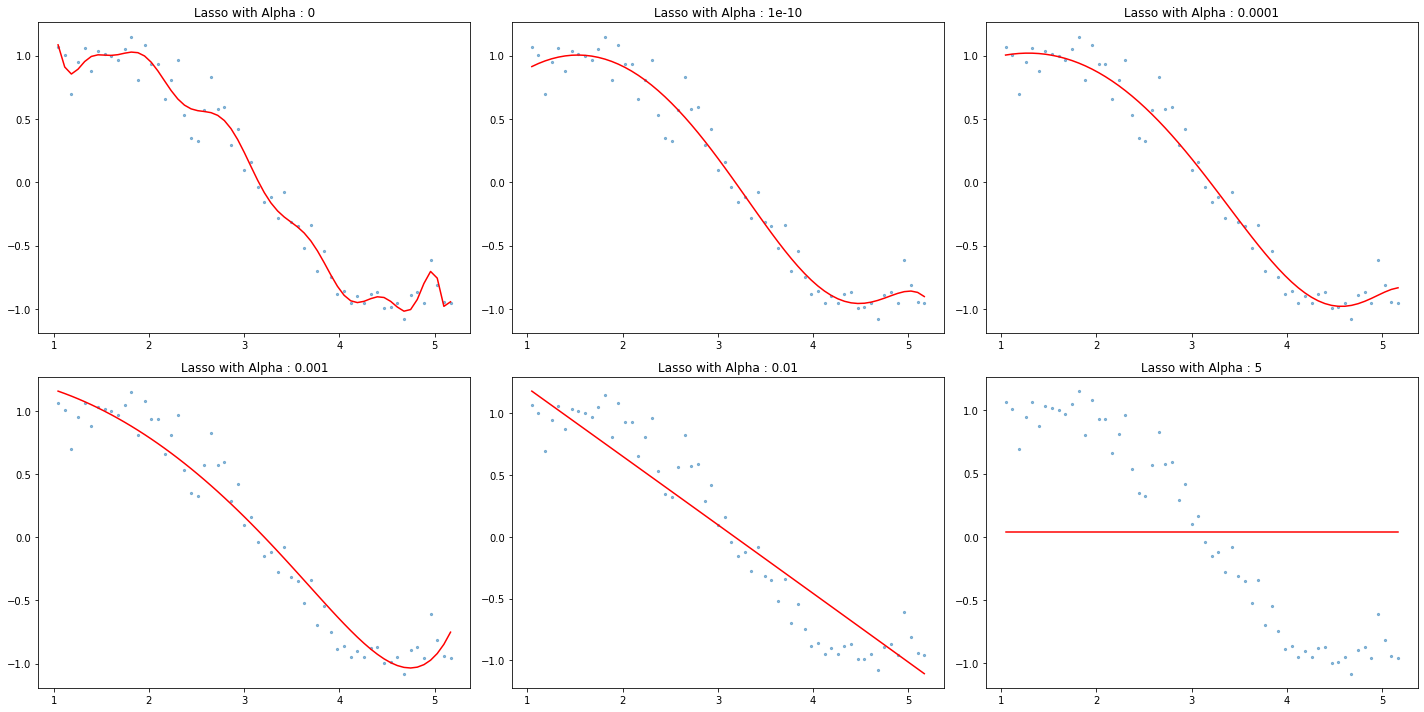

In [ ]:
def lasso_regression(data, predictors, alpha, plot):
  
  if alpha == 0:
    reg = LinearRegression(normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  else:
    reg = Lasso(alpha=alpha, normalize=True)
    reg.fit(data[predictors], data['y'])
    y_pred = reg.predict(data[predictors])

  if alpha in plot:
    plt.subplot(plot[alpha])
    plt.tight_layout()
    plt.plot(data['X'], y_pred, color='red')
    plt.scatter(data['X'], data['y'], s=5, alpha=0.5)
    plt.title('Lasso with Alpha : %.3g'%alpha)

  RSS = sum((y_pred - data['y'])**2)
  result = [RSS]
  result.extend([reg.intercept_])
  result.extend(reg.coef_)
  return result

predictors=['X']
predictors.extend(['X_%d'%i for i in range(2, 16)])

ridge_alpha = [0, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

col = ['RSS', 'Intercept'] + ['Coef_X_%d'%i for i in range(1, 16)]
idx = ['alpha : %.2g'%i for i in ridge_alpha]
coef_matrix = pd.DataFrame(index = idx, columns=col)

plot = {0:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}

for i in range(10):
  coef_matrix.iloc[i,] = lasso_regression(data, predictors, ridge_alpha[i], plot=plot)#intercept 데이터의 평균값

coef_matrix